In [18]:
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
#Some data preprocessing - from DataFrame to NumPy array with a column of ones in the beginnging

features = iris.columns[0:4]
X = iris[features].to_numpy()


from sklearn.preprocessing import LabelBinarizer
species = LabelBinarizer()
Y = species.fit_transform(iris.species.values)


from sklearn.model_selection import train_test_split
X_tr, X_te, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None)

y_test


array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [20]:
b = np.ones((X_te1.shape[0], 1))
X_test = np.append(b, X_te, axis=1 )

b = np.ones((X_tr1.shape[0], 1))
X_train = np.append(b, X_tr, axis=1 )


In [21]:
for i in range(y_train.shape[0]):
    for j in range (3):
        if(y_train[i][j] == 0):
            y_train[i][j] = -1
y_train

for i in range(y_test.shape[0]):
    for j in range (3):
        if(y_test[i][j] == 0):
            y_test[i][j] = -1
y_test

array([[-1, -1,  1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1],
       [-1,  1, -1],
       [ 1, -1, -1],
       [ 1, -1, -1],
       [-1,  1, -1],
       [-1,  1, -1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [-1,  1, -1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [ 1, -1, -1],
       [-1, -1,  1],
       [ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1],
       [-1,  1, -1],
       [ 1, -1, -1],
       [-1,  1, -1],
       [-1, -1,  1],
       [-1, -1,  1],
       [-1, -1,  1]])

In [22]:
def sigmoid(s):
    return np.exp(s)/(1+np.exp(s))
sigmoid (0)


def predict(X, weights):
    s = np.dot(weights.T, X)
    return sigmoid(s) #returns probability!


def stochastic_gradient_descent (X_train, X_test, y_train, y_test, iterations, learning_rate, type):
    E_in = []
    E_out = []
    E_in_average = []
    E_out_average = []
    instances, features = X_train.shape
    weights = np.zeros(features)
    
    
    
    for i in range(iterations):
        #print(weights)
        #print(predict((X_test[0]), weights[1:]))
        
        ind = np.random.randint(instances)
        
       
        gradient = (-y_train[ind][type-1] * X_train[ind])/(1+np.exp(y_train[ind][type-1]*2*np.dot(weights.T, X_train[ind])))
        
        weights[:] = weights - gradient * learning_rate
        #print(weights)
        
        E = []
        for j in range (len(X_train)):
            err = np.log(1+np.exp(-y_train[j][type-1]*np.dot(weights.T, X_train[j])))
            E.append(err)
        E_in_average.append(np.average(E))
        
        
        #cross_entropy_error_in = np.log(1+np.exp(-y_train[ind][type-1]*np.dot(weights.T, X_train[ind])))
        #E_in.append(cross_entropy_error_in)
        #E_in_average.append(np.average(E_in))
        
        E_out_total = 0
        for j in range(len(X_test)):
            cross_entropy_error_out = np.log(1+np.exp(-y_test[j][type-1]*2*np.dot(weights.T, X_test[j])))
            E_out_total += cross_entropy_error_out
        E_out.append(E_out_total / X_test.shape[0])
        
        E_out_average.append(np.average(E_out))
        
    return weights, E_in, E_in_average, E_out, E_out_average

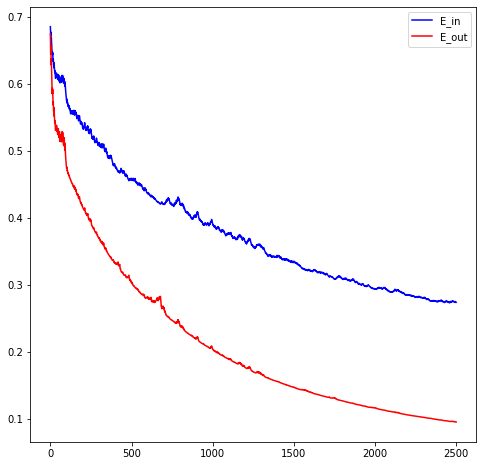

In [23]:
weights, E_in, E_in_average, E_out, E_out_average = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 2500, 0.001, 1)
fig = plt.figure(figsize=(8,8))
plt.plot(range(2500), E_in_average, 'b', label='E_in')
plt.plot(range(2500), E_out, 'r', label='E_out')
plt.legend()

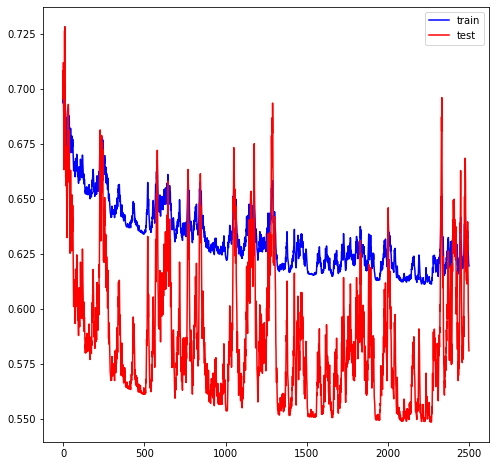

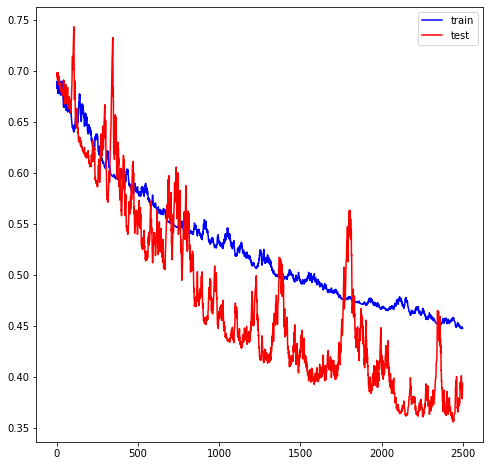

In [24]:
weights, E_in, E_in_average, E_out, E_out_average = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 2500, 0.001, 2)

fig = plt.figure(figsize=(8,8))
plt.plot(range(2500), E_in_average, 'b', label='train')
plt.plot(range(2500), E_out, 'r', label='test')
plt.legend()

weights, E_in, E_in_average, E_out, E_out_average = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 2500, 0.001, 3)

fig = plt.figure(figsize=(8,8))
plt.plot(range(2500), E_in_average, 'b', label='train')
plt.plot(range(2500), E_out, 'r', label='test')
plt.legend()

In [25]:
w1 = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 5000, 0.001,1)[0]
w2 = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 5000, 0.001,2)[0]
w3 = stochastic_gradient_descent(X_train, X_test, y_train, y_test, 5000, 0.001,3)[0]

count = 0
for i in range(len(X_test)):
    g1 = np.dot(w1.T, X_test[i])
    g2 = np.dot(w2.T, X_test[i])
    g3 = np.dot(w3.T, X_test[i])
    if(g1<g2):
        if(g2<g3):
            flag = 3
        else:
            flag = 2
    else:
        if(g1<g3):
            flag = 3
        else:
            flag = 1
    for j in range(3):
        if(y_test[i][j] == 1):
            output = j+1
    if(flag == output):
        count+=1
    print(g1, g2, g3, flag, output, sep = ' ')
print("Accuracy:", count/len(X_test)*100, "%", sep = ' ')   

-2.52670004363548 -0.1268085892578822 -0.1940433683900984 2 3
-2.316868265829725 -0.013181763576461863 0.23708885632693688 3 3
1.018651379305032 -0.7017548802241012 -2.0628525957089106 1 1
-1.2893337355265864 -0.22719359508616974 -0.5969096777739533 2 2
-2.5314468834227144 -0.0035475842954671988 -0.013552495649233665 2 3
-1.3656487628495513 -0.2516935277342549 -0.5438824413896624 2 2
1.0395896295235048 -0.7598055213434896 -2.355241600085872 1 1
1.3115954602082027 -0.8838328093292693 -2.5372992960499654 1 1
-1.5826125641880489 -0.1991101650371025 -0.6012273131759049 2 2
-1.2152626807919304 -0.22367195246050858 -0.7249601042452014 2 2
1.2932845562235586 -0.8657480583804843 -2.4201363562594396 1 1
-2.194607819426174 -0.10172843652695185 -0.02786826923137342 3 3
-1.3508215012007876 -0.19995560214799474 -0.71136258367273 2 2
-2.407455646713465 0.028634879070600278 -0.12456919671569455 2 3
1.2008016461731383 -0.9180957167414973 -2.4613130758780435 1 1
-2.665532237656829 0.016451531831541466 